In [1]:
!pip install geopandas
!pip install geoplot

import matplotlib
import pandas as pd

from pandas import read_csv
from google.colab import files
from plotly.express import line,bar

     |████████████████████████████████| 1.0 MB 28.7 MB/s 
     |████████████████████████████████| 16.7 MB 282 kB/s 
     |████████████████████████████████| 6.3 MB 53.0 MB/s 
     |████████████████████████████████| 10.8 MB 50.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 43.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 48.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 49.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 428 kB/s 
     |████████████████████████████████| 44 kB 3.1 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.

In [2]:
# Let's explore the ACS data of the 5 core Atlanta counties
# Our focus: Asian & Latin immigrant growth
# Did the it lame way and transposed everything in Excel

#Clayton County
ACS_ClaytonCounty = pd.read_csv('https://raw.githubusercontent.com/linusleli/atlanta_project/main/Clayton%20County%2C%20GA_2010-2019_Race.csv',parse_dates=True)
ACS_ClaytonCounty
# Drop columns 8-20--useless information
ACS_Clayton_Race = ACS_ClaytonCounty.drop(ACS_ClaytonCounty.iloc[:,8:21], inplace=False, axis=1)
ACS_Clayton_Race['Total'] = ACS_Clayton_Race.sum(axis=1)
ACS_Clayton_Race

#Cobb County
ACS_CobbCounty = pd.read_csv('https://raw.githubusercontent.com/linusleli/atlanta_project/main/Cobb%20County%2C%20GA_2010-2019_Race.csv',parse_dates=True)
ACS_CobbCounty_Race = ACS_CobbCounty.drop(ACS_CobbCounty.iloc[:,8:12], inplace=False, axis=1)
ACS_CobbCounty_Race['Total'] = ACS_CobbCounty_Race.sum(axis=1)

#DeKalb County
ACS_DeKalbCounty = pd.read_csv('https://raw.githubusercontent.com/linusleli/atlanta_project/main/DeKalb%20County%2C%20GA_2010-2019_Race.csv',parse_dates=True)
ACS_DeKalbCounty_Race = ACS_DeKalbCounty.drop(ACS_DeKalbCounty.iloc[:,8:13], inplace=False, axis=1)
ACS_DeKalbCounty_Race['Total'] = ACS_DeKalbCounty_Race.sum(axis=1)

#Fulton County
ACS_FultonCounty = pd.read_csv('https://raw.githubusercontent.com/linusleli/atlanta_project/main/Fulton%20County%2C%20GA_2010-2019_Race.csv',parse_dates=True)
ACS_FultonCounty_Race = ACS_FultonCounty.drop(ACS_FultonCounty.iloc[:,8:11], inplace=False, axis=1)
ACS_FultonCounty_Race['Total'] = ACS_FultonCounty_Race.sum(axis=1)

#Gwinnett County
ACS_GwinnettCounty = pd.read_csv('https://raw.githubusercontent.com/linusleli/atlanta_project/main/Gwinnett%20County%2C%20GA_2010-2019_Race.csv',parse_dates=True)
ACS_GwinnettCounty_Race = ACS_GwinnettCounty.drop(ACS_GwinnettCounty.iloc[:,8:12], inplace=False, axis=1)
ACS_GwinnettCounty_Race['Total'] = ACS_GwinnettCounty_Race.sum(axis=1)

In [3]:
ACS_DeKalbCounty_Race

,Year,White,Black or African American,American Indian and Alaska Native,Asian,Some other race,Two or more races,Hispanic or Latino,Total
0,2010,247200,377250,1005,35409,21748,10184,68113,762919
1,2011,245747,373305,2234,36004,26115,14676,68759,768851
2,2012,245500,383076,1538,37036,26739,13200,67461,776562
3,2013,262974,379477,1970,39286,12543,17075,65120,780458
4,2014,254994,387613,1844,41555,19845,16194,64279,788338
5,2015,255926,397016,5917,43858,16841,15243,64515,801331
6,2016,259015,403352,5253,45634,9586,17380,63287,805523
7,2017,252104,399972,10691,44788,14112,30618,65070,819372
8,2018,265235,403014,6959,47716,7938,22828,65060,820768
9,2019,256943,409327,11330,47162,15189,19017,64757,825744


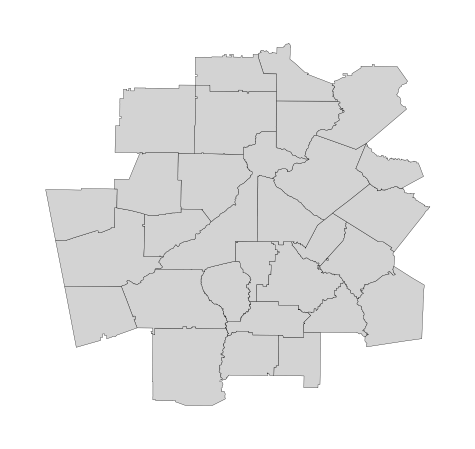

In [4]:
# Before we carry on, let's have a look at the area

import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

ATL_Core_Counties = gpd.read_file('https://opendata.arcgis.com/datasets/53ca7db14b8f4a9193c1883247886459_67.geojson')
ATL_Core_Counties.crs

geoplot.polyplot(ATL_Core_Counties,edgecolor='black', facecolor='lightgrey', linewidth=.3,figsize=(12, 8))

In [5]:
ACS_Clayton_Race.columns

Index(['Year', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian', 'Some other race',
       'Two or more races', 'Hispanic or Latino', 'Total'],
      dtype='object')

In [6]:
ACS_Clayton_Race

,Year,White,Black or African American,American Indian and Alaska Native,Asian,Some other race,Two or more races,Hispanic or Latino,Total
0,2010,51358,170321,400,13039,16125,8380,35529,297162
1,2011,61374,173552,682,12978,7999,4889,35363,298848
2,2012,59452,174489,222,13256,11862,6607,35546,303446
3,2013,62521,174804,653,13752,7609,4700,34825,300877
4,2014,56678,182386,102,13958,10799,3619,35134,304690
5,2015,55071,183597,190,14513,14706,5878,35500,311470
6,2016,43114,190956,926,14614,21285,8567,36732,318210
7,2017,44964,200852,802,14969,15790,7776,37927,325097
8,2018,44414,202746,308,14865,17176,9738,38635,329900
9,2019,49935,203719,103,14986,11168,11108,39195,332233


In [7]:
# Clayton County
# "White" population only bounces back beginning 2018
# Traditionally less well off group (i.e. Latinos and Blacks) population has gone up steadily. Why?

line(ACS_Clayton_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="Clayton County")

# There is also a steady population growth:
chart = bar(ACS_Clayton_Race,
            x="Year",
            y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],
            text = 'Total')

chart.update_traces(textposition='outside')

In [8]:
# Cobb County
# "White" is the only group experiencing decline, but they're also the dominant group.
# Black of African American is the fastest growing group.

line(ACS_CobbCounty_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="Cobb County")

# Steady population growth also confirmed:
bar(ACS_CobbCounty_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="Cobb County")

In [9]:
# Biggest increase is in Black & African Americans (which also has a significantly higher share). White stayed steady.
# Removing outliers: Black & African Americans and Whites...And we can see hispanics are also in decline. Why?
line(ACS_DeKalbCounty_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="DeKalb County")

# Checking population growth:
bar(ACS_DeKalbCounty_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="DeKalb County")

In [10]:
# How much all the other groups trail White/Black or African American in terms of population?
# Next Step: Education level might be worth looking into
line(ACS_FultonCounty_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="Fulton County")

# Check steady population growth: confirmed.
bar(ACS_FultonCounty_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="Fulton County")

In [11]:
# White dominates. No population decline. Note most of the groups here are also expericing population growth
# Refer to imagery and ACS data to determine how much the density has grown
# Housing costs--what has that look like since 2010?
line(ACS_GwinnettCounty_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="Gwinnett County")

# Check population growth: Yeup
bar(ACS_GwinnettCounty_Race,x="Year",y=["Black or African American","White","American Indian and Alaska Native","Asian","Some other race","Two or more races","Hispanic or Latino"],title="Gwinnett County")

## Proposed question 1 -- to be refined.
### We can see that there is a steady population growth in every single one of the 5 core Atlanta counties. 

The question now is that with more people living in the area, are geographical boundaries that once separated the urban and suburban areas blurred? To understand that, let's have a look at some [satellite imagery data](https://colab.research.google.com/drive/18z9yhwUStV6Sx55EdhsnWnKQM2Ys5Oz5). And a further question to answer--as density grows, how many trees have been lost as a result?

Moving on, please click [here](https://github.com/aday651/comp-journal/blob/master/ajc-satellite/atlanta-nighttme.ipynb).


## Proposed Question 2
### Home prices in the core counties

Atlanta is also known as the city of construction--single family homes are amongst factors driving this trend. This potential pitch explores what the so-called construction boom has meant for home prices in the core counties. The satellite imagery data can be used to examine where these homes have been built. Government/private data shall show the prices of these properties. Should also compare this against US cities with a similar population (taking inflation into account).

## Proposed Question 3
### Industrial Pollution

WHo are the biggest contributors and where in the world are these factory plants? What does it mean for people who live in the affected areas. From an environemntal point of view, what does this mean for the birds? Less bird poop? And what about other animals and pets?